In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

df = pd.read_csv('data/dataset_med.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [9]:
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce')

df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

df.drop(columns=['diagnosis_date', 'end_treatment_date'], inplace=True)

df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
0,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0,523
1,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1,424
2,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0,370
3,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0,443
4,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0,406


In [10]:
binary_cols = ['gender', 'family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'male': 1, 'female': 0})

df[binary_cols].head()

,gender,family_history,hypertension,asthma,cirrhosis,other_cancer
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
one_hot_cols = ['country', 'cancer_stage', 'treatment_type', 'smoking_status']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df.head()

,age,gender,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,...,country_Sweden,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker
0,64.0,NaN,NaN,29.4,199,NaN,NaN,NaN,NaN,0,...,True,False,False,False,False,False,False,False,False,True
1,50.0,NaN,NaN,41.2,280,NaN,NaN,NaN,NaN,1,...,False,False,True,False,False,False,True,False,False,True
2,65.0,NaN,NaN,44.0,268,NaN,NaN,NaN,NaN,0,...,False,False,True,False,True,False,False,True,False,False
3,51.0,NaN,NaN,43.0,241,NaN,NaN,NaN,NaN,0,...,False,False,False,False,False,False,False,False,False,True
4,37.0,NaN,NaN,19.7,178,NaN,NaN,NaN,NaN,0,...,False,False,False,False,True,False,False,False,False,True


In [12]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.fillna(0, inplace=True)

df.isna().sum().sum()

0

In [13]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((712000, 45), (178000, 45))

In [14]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7771179775280899

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87    138799
           1       0.19      0.00      0.01     39201

    accuracy                           0.78    178000
   macro avg       0.49      0.50      0.44    178000
weighted avg       0.65      0.78      0.68    178000


Confusion Matrix:
 [[138181    618]
 [ 39055    146]]


In [15]:
random_sample = X_test.sample(1)
prediction = model.predict(random_sample)[0]

true_label = y_test.loc[random_sample.index[0]]

print("Predicted:", "Survived ✅" if prediction == 1 else "Did not survive ❌")
print("Actual:   ", "Survived ✅" if true_label == 1 else "Did not survive ❌")

Predicted: Did not survive ❌
Actual:    Survived ✅


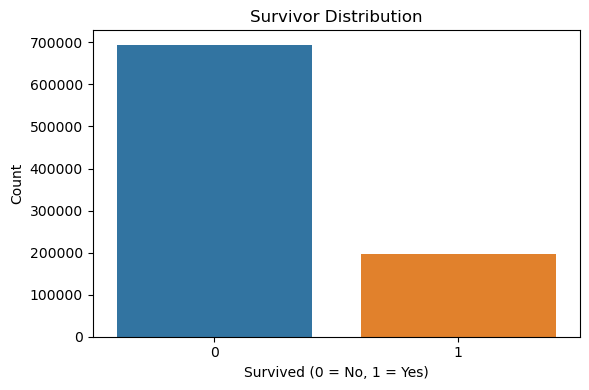

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/dataset_med.csv')
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Survivor Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

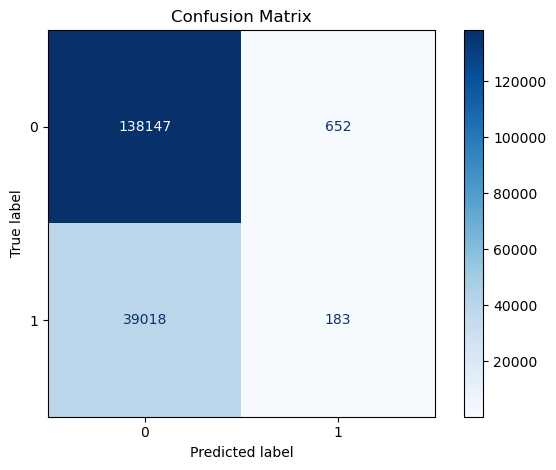

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()